# Association Rules

- Apply association rules on grocery dataset using Apriori algorithm

Total item count: 43367


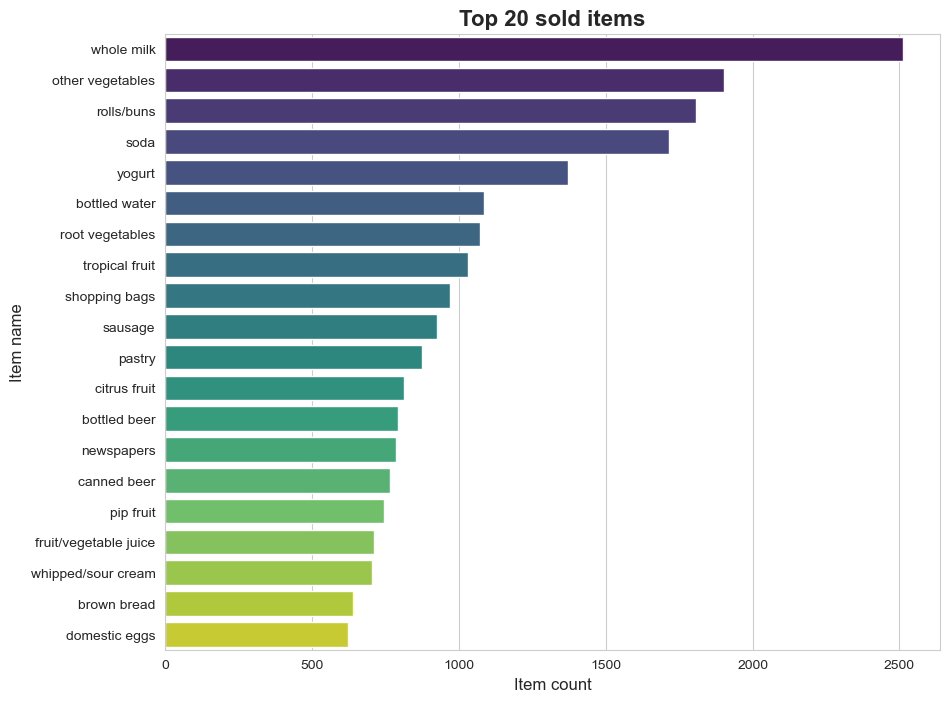

In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

def read_data_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        lines = response.text.split('\n')
        grocery_items = set()
        transaction_list = []
        for line in lines:
            items = line.strip().split(',')
            grocery_items.update(items)
            transaction_list.append(items)

        # Convert transactions to binary format using TransactionEncoder
        te = TransactionEncoder()
        te_ary = te.fit_transform(transaction_list)
        df = pd.DataFrame(te_ary, columns=te.columns_)

        return df, grocery_items
    else:
        print("Failed to fetch data from URL.")
        return None, None

def view_top_sold_items(grocery):
    total_item_count = sum(grocery.sum())
    print(f'Total item count: {total_item_count}') # Total item count
    item_summary = grocery.sum().sort_values(ascending=False).reset_index()
    item_summary.rename(columns={item_summary.columns[0]: 'item_name', item_summary.columns[1]: 'item_count'}, inplace=True)

    # Set seaborn style
    sns.set_style(style="whitegrid")

    # Create horizontal bar plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='item_count', y='item_name', data=item_summary.head(20),
                palette="viridis",
                # color='steelblue'
                )
    plt.xlabel('Item count', fontsize=12)
    plt.ylabel('Item name', fontsize=12)
    plt.title('Top 20 sold items', fontsize=16, fontweight='bold')
    plt.show()

url = "https://raw.githubusercontent.com/satishrath185/Market-Basket-Analysis/master/grocery_dataset.txt"
grocery, _ = read_data_from_url(url)
view_top_sold_items(grocery)


In [2]:
# Create a function for Apriori algorithm and association rules
def apriori_association_rules(data, min_support, metric, min_threshold):
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    print(f' Number of frequent itemsets: {len(frequent_itemsets)}\n', sep= '\n' )
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    print(f' Number of association rules: {len(rules)}\n', sep= '\n' )
    return frequent_itemsets, rules

# Apply Apriori algorithm
frequent_itemsets, rules = apriori_association_rules(grocery, min_support=0.005, metric="confidence", min_threshold=0.01)

# Show association rules dataframe
rules

 Number of frequent itemsets: 1000

 Number of association rules: 2960



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111,0.556472
1,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668,0.512099
2,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626,0.211331
3,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964,0.253267
4,(rolls/buns),(UHT-milk),0.183935,0.033452,0.006406,0.034826,1.041071,0.000253,1.001423,0.048343
...,...,...,...,...,...,...,...,...,...,...
2955,"(yogurt, whole milk)","(tropical fruit, root vegetables)",0.056024,0.021047,0.005694,0.101633,4.828814,0.004515,1.089703,0.839969
2956,(tropical fruit),"(root vegetables, yogurt, whole milk)",0.104931,0.014540,0.005694,0.054264,3.732043,0.004168,1.042003,0.817871
2957,(root vegetables),"(tropical fruit, yogurt, whole milk)",0.108998,0.015150,0.005694,0.052239,3.448112,0.004043,1.039133,0.796841
2958,(yogurt),"(tropical fruit, root vegetables, whole milk)",0.139502,0.011998,0.005694,0.040816,3.401937,0.004020,1.030045,0.820513


In [3]:
# Top 5 rules with highest support
rules.sort_values(by='support', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
960,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
961,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
1070,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
1071,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
1206,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732


In [4]:
# Rules with confidence greater than 0.5
rules[rules['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725,0.520642
1244,"(beef, yogurt)",(whole milk),0.011693,0.255516,0.006101,0.521739,2.041904,0.003113,1.556648,0.516298
1274,"(bottled beer, yogurt)",(whole milk),0.009253,0.255516,0.005186,0.560440,2.193364,0.002821,1.693701,0.549160
1280,"(bottled water, butter)",(whole milk),0.008948,0.255516,0.005389,0.602273,2.357084,0.003103,1.871845,0.580945
1436,"(root vegetables, brown bread)",(whole milk),0.010168,0.255516,0.005694,0.560000,2.191643,0.003096,1.692009,0.549307
...,...,...,...,...,...,...,...,...,...,...
2918,"(tropical fruit, other vegetables, yogurt)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317,0.595089
2920,"(tropical fruit, yogurt, whole milk)",(other vegetables),0.015150,0.193493,0.007626,0.503356,2.601421,0.004694,1.623913,0.625064
2932,"(whipped/sour cream, other vegetables, yogurt)",(whole milk),0.010168,0.255516,0.005592,0.550000,2.152507,0.002994,1.654409,0.540925
2934,"(whipped/sour cream, yogurt, whole milk)",(other vegetables),0.010880,0.193493,0.005592,0.514019,2.656529,0.003487,1.659544,0.630428


In [5]:
# Rules with lift greater than 3 and number of items in antecedents is one
rules[(rules['lift'] > 3) & (rules['antecedents'].apply(lambda x: len(x) == 1))]
# rules[rules['lift'] > 3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,0.753189
37,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
62,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461,0.761960
63,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428,0.793507
318,(frozen vegetables),(chicken),0.048094,0.042908,0.006711,0.139535,3.251956,0.004647,1.112296,0.727480
...,...,...,...,...,...,...,...,...,...,...
2930,(yogurt),"(tropical fruit, other vegetables, whole milk)",0.139502,0.017082,0.007626,0.054665,3.200164,0.005243,1.039756,0.798974
2942,(whipped/sour cream),"(other vegetables, yogurt, whole milk)",0.071683,0.022267,0.005592,0.078014,3.503514,0.003996,1.060464,0.769750
2956,(tropical fruit),"(root vegetables, yogurt, whole milk)",0.104931,0.014540,0.005694,0.054264,3.732043,0.004168,1.042003,0.817871
2957,(root vegetables),"(tropical fruit, yogurt, whole milk)",0.108998,0.015150,0.005694,0.052239,3.448112,0.004043,1.039133,0.796841


In [6]:
# Check number of rules with strong conviction
print(f' Number of rules with strong conviction: {len(rules[rules["conviction"] > 1])}')

 Number of rules with strong conviction: 2868


In [7]:
# Check the frequency of items in antecedents and show top 10
rules['antecedents'].value_counts().head(10)

antecedents
(whole milk)            229
(other vegetables)      195
(yogurt)                128
(rolls/buns)            114
(root vegetables)       105
(tropical fruit)         93
(soda)                   89
(sausage)                61
(bottled water)          61
(whipped/sour cream)     57
Name: count, dtype: int64

In [8]:
# Check the frequency of items in consequents and show top 10
rules['consequents'].value_counts().head(10)

consequents
(whole milk)            229
(other vegetables)      195
(yogurt)                128
(rolls/buns)            114
(root vegetables)       105
(tropical fruit)         93
(soda)                   89
(bottled water)          61
(sausage)                61
(whipped/sour cream)     57
Name: count, dtype: int64

In [9]:
# Top 5 rules with highest leverage
rules.sort_values(by='leverage', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
931,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
930,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
960,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
961,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
1092,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202


In [10]:
# Top 5 rules with highest zhangs_metric
rules.sort_values(by='zhangs_metric', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2803,(other vegetables),"(citrus fruit, root vegetables, whole milk)",0.193493,0.009151,0.005796,0.029953,3.273165,0.004025,1.021444,0.861102
2959,(whole milk),"(tropical fruit, root vegetables, yogurt)",0.255516,0.008134,0.005694,0.022284,2.739554,0.003616,1.014472,0.852909
2828,"(other vegetables, whole milk)","(root vegetables, pip fruit)",0.074835,0.015557,0.005491,0.073370,4.716272,0.004326,1.062390,0.851705
2831,(other vegetables),"(root vegetables, whole milk, pip fruit)",0.193493,0.008948,0.005491,0.028376,3.171368,0.003759,1.019996,0.848943
2804,(root vegetables),"(other vegetables, citrus fruit, whole milk)",0.108998,0.013015,0.005796,0.053172,4.085493,0.004377,1.042412,0.847621


# Visualization of association rules for better understanding of rules

In [11]:
# Copy to new dataframe for plotting
rules_plot = rules.copy(deep=True)

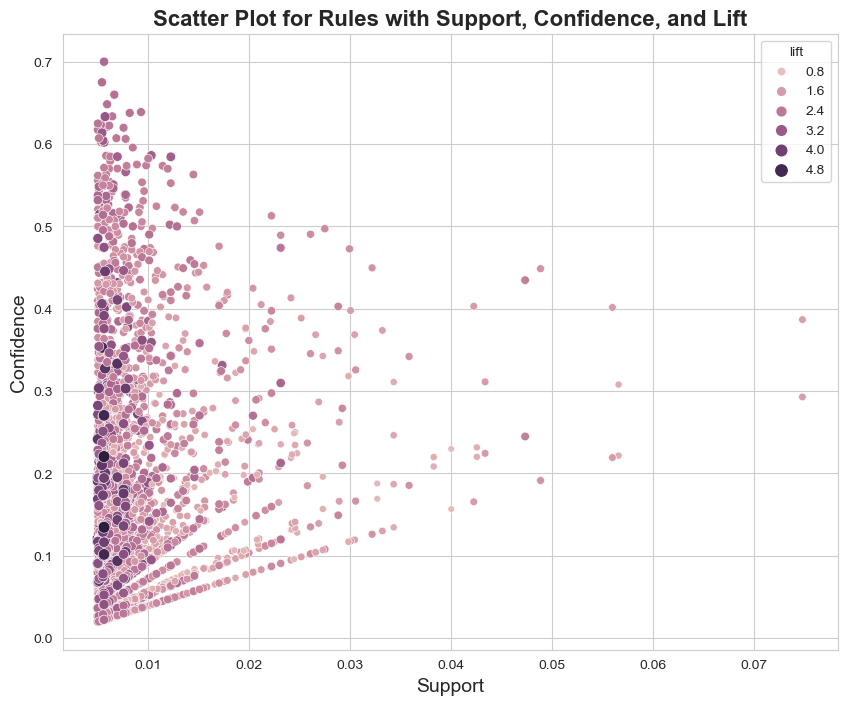

In [12]:
# Convert frozensets to strings
rules_plot['antecedents'] = rules_plot['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_plot['consequents'] = rules_plot['consequents'].apply(lambda x: ', '.join(list(x)))

# Scatter plot using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift',
                data=rules_plot)
plt.title('Scatter Plot for Rules with Support, Confidence, and Lift',
          fontsize=16, fontweight='bold')
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.show()

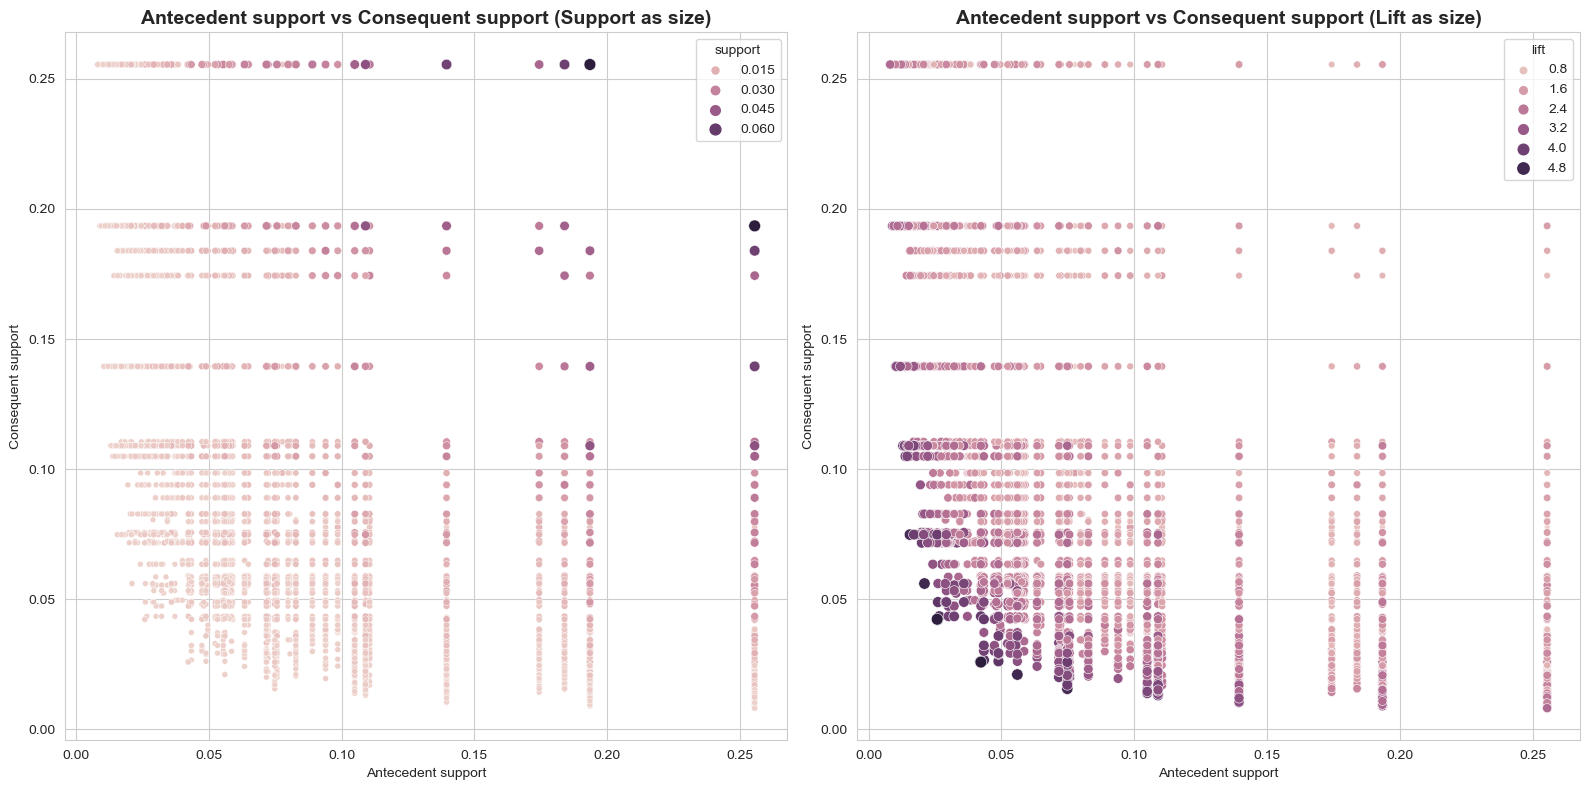

In [13]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for antecedent support and consequent support
sns.scatterplot(x='antecedent support', y='consequent support', size='support',
                data=rules_plot, hue='support', ax=axes[0])
axes[0].set_xlabel('Antecedent support')
axes[0].set_ylabel('Consequent support')
axes[0].set_title('Antecedent support vs Consequent support (Support as size)',
                  fontsize=14, fontweight='bold')

# Scatter plot for antecedent support and consequent support with lift as size
sns.scatterplot(x='antecedent support', y='consequent support', size='lift',
                data=rules_plot, hue='lift', ax=axes[1])
axes[1].set_xlabel('Antecedent support')
axes[1].set_ylabel('Consequent support')
axes[1].set_title('Antecedent support vs Consequent support (Lift as size)',
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


- From these scatter plots, we can see that applying pruning methods with the thresholds of some metrics: support, confidence, and lift, we can reduce the number of rules and get association rules which have good performance.

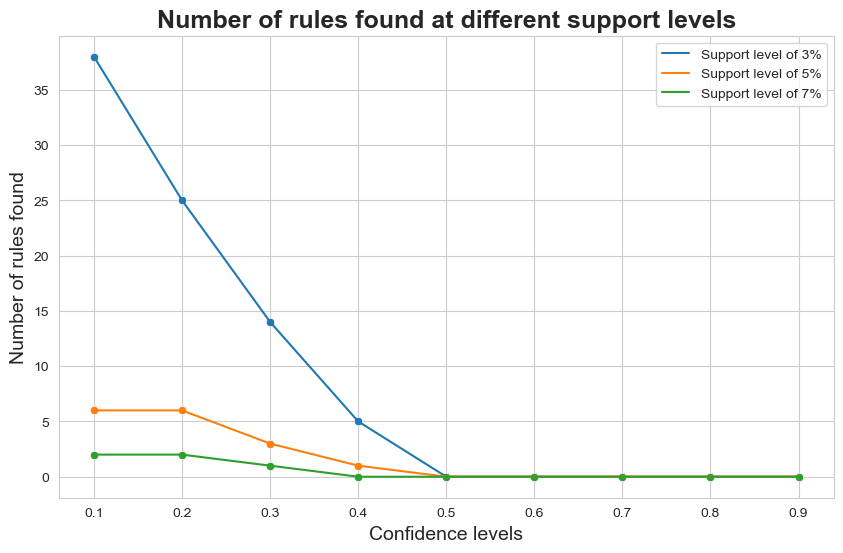

In [14]:
# Define support and confidence levels
support_levels = [0.03, 0.05, 0.07]
confidence_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize list to store number of rules applying Apriori on grocery for each support level
rules_support_gt_03 = []
rules_support_gt_05 = []
rules_support_gt_07 = []

# Apply Apriori algorithm for each support level
for support in support_levels:
    # Apply Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(grocery, min_support=support, use_colnames=True)

    # Check if frequent_itemsets is empty
    if frequent_itemsets.empty:
        print(f"No rules found for support level {support}")
        continue
    # Generate association rules for each confidence level
    num_rules = []
    for confidence in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        num_rules.append(len(rules))

    # Append number of rules to corresponding list
    if support == 0.03:
        rules_support_gt_03 = num_rules
    elif support == 0.05:
        rules_support_gt_05 = num_rules
    elif support == 0.07:
        rules_support_gt_07 = num_rules

# Create a DataFrame
num_rules = pd.DataFrame({
    'rules_sup_3': rules_support_gt_03,
    'rules_sup_5': rules_support_gt_05,
    'rules_sup_7': rules_support_gt_07,
    'confidenceLevels': confidence_levels
})

# Plot using Seaborn and Matplotlib
sns.set_style(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot lines and points for each support level
sns.lineplot(x='confidenceLevels', y='rules_sup_3', data=num_rules, label="Support level of 3%")
sns.scatterplot(x='confidenceLevels', y='rules_sup_3', data=num_rules)
sns.lineplot(x='confidenceLevels', y='rules_sup_5', data=num_rules, label="Support level of 5%")
sns.scatterplot(x='confidenceLevels', y='rules_sup_5', data=num_rules)
sns.lineplot(x='confidenceLevels', y='rules_sup_7', data=num_rules, label="Support level of 7%")
sns.scatterplot(x='confidenceLevels', y='rules_sup_7', data=num_rules)

# Set labels and title
plt.xlabel("Confidence levels", fontsize=14)
plt.ylabel("Number of rules found", fontsize=14)
plt.title(f"Number of rules found at different support levels", fontdict={"fontsize": 18, "fontweight": "bold"})
plt.legend()

plt.show()

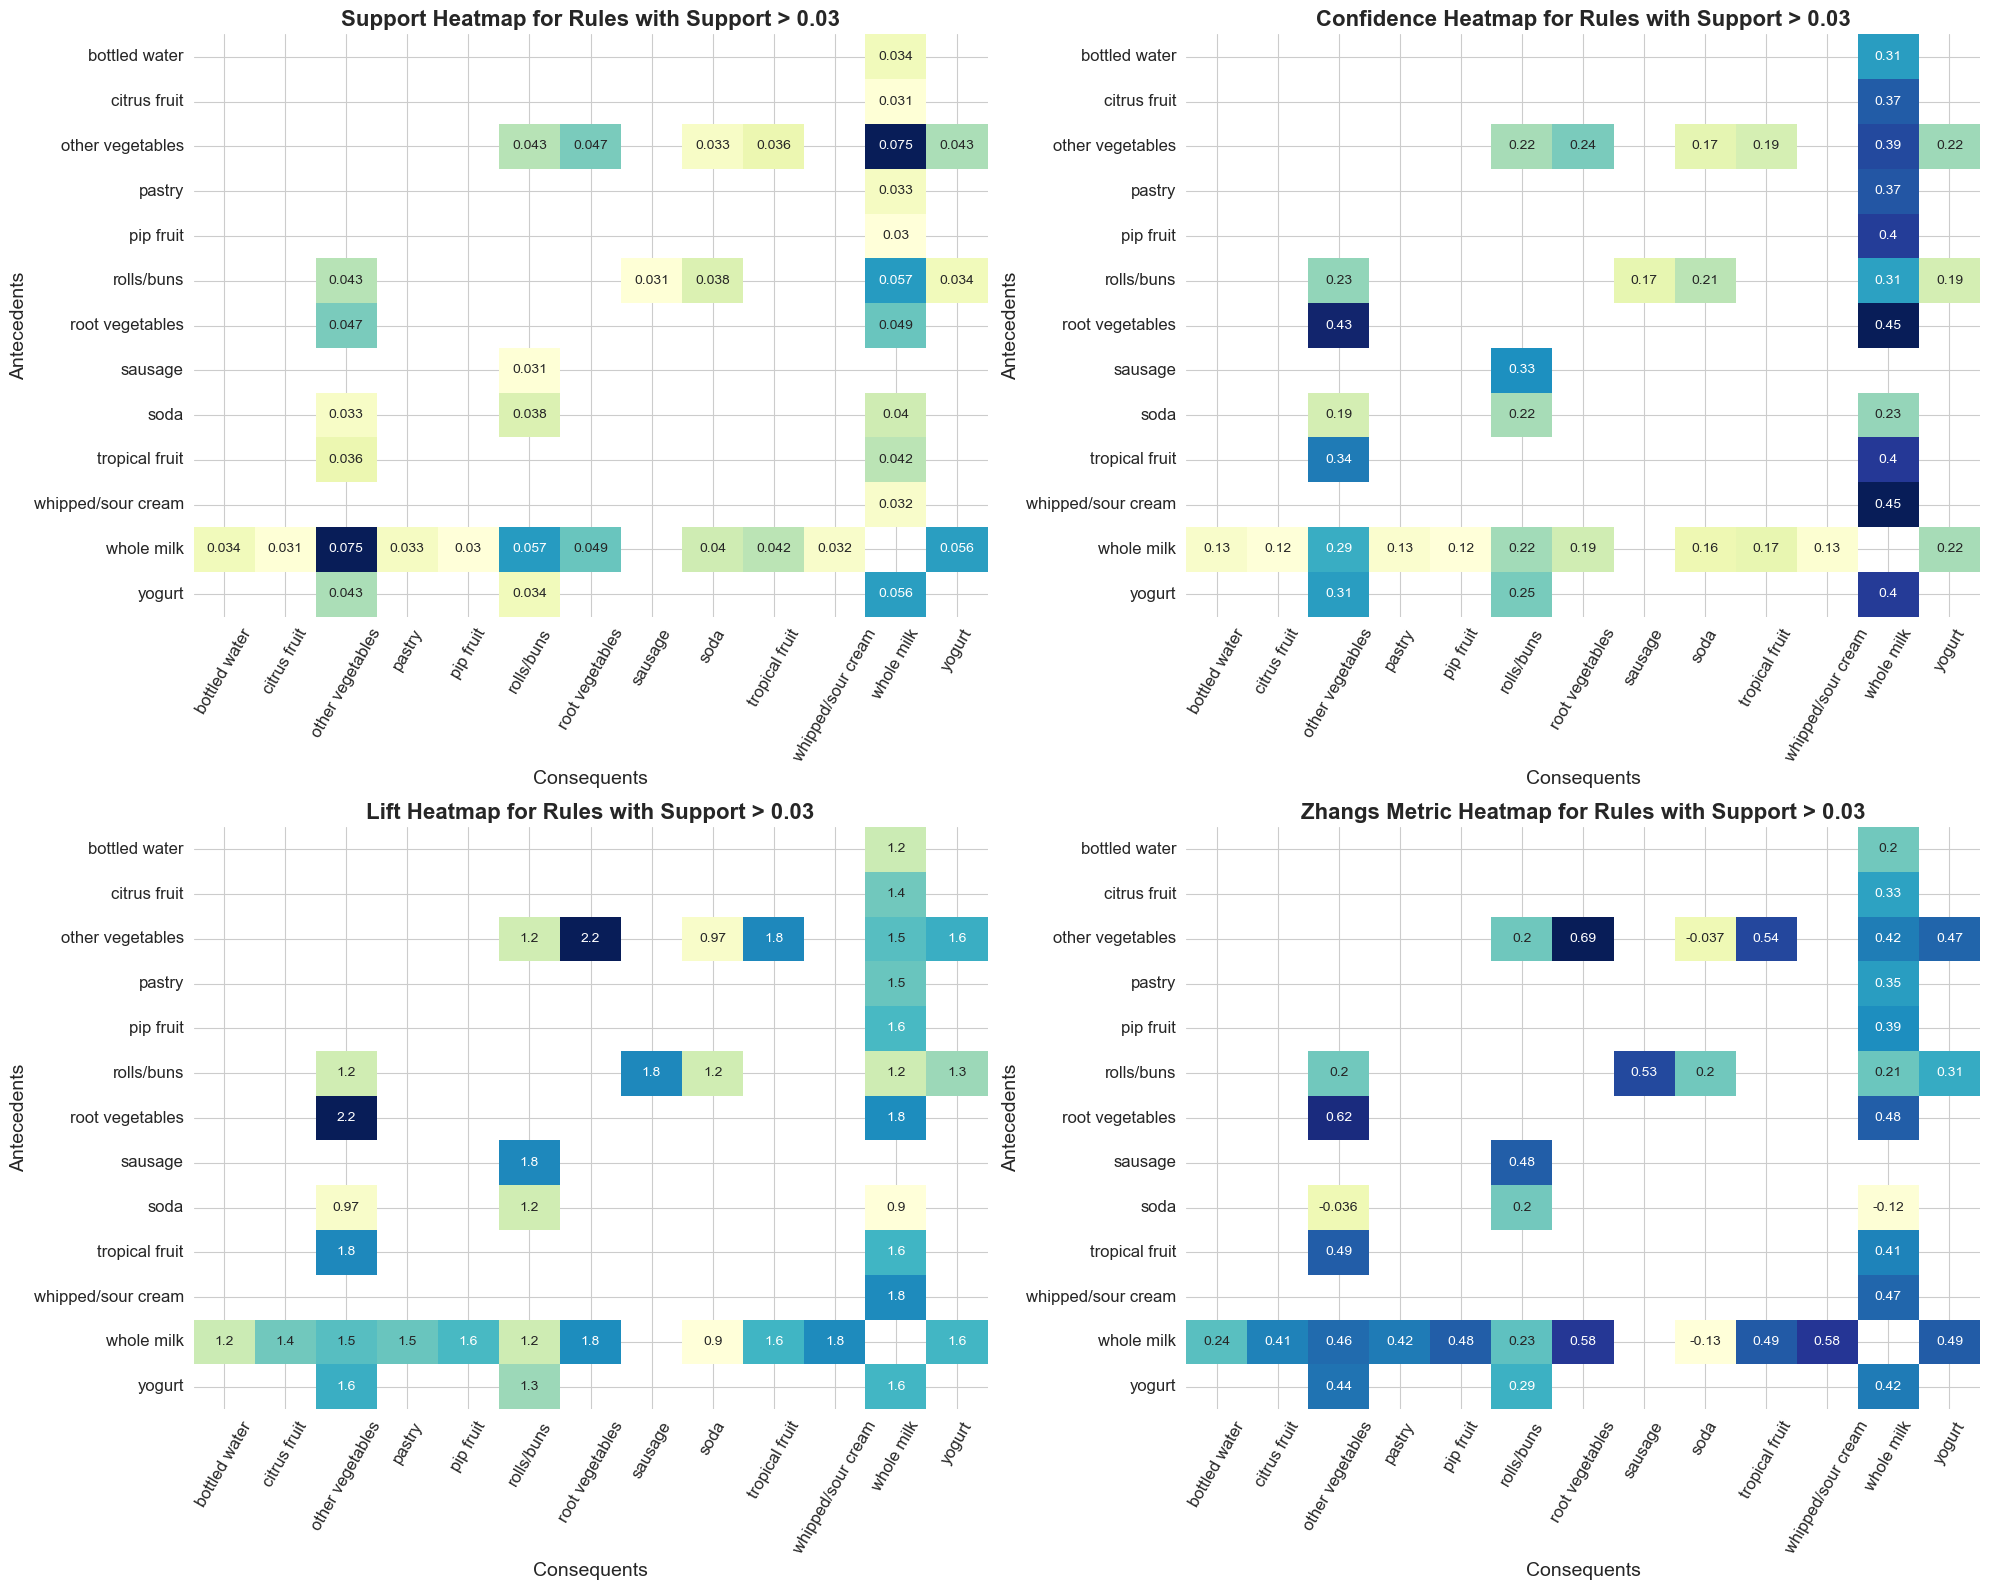

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select rules with support greater than 0.04
rules_support_gt_03 = rules_plot[rules_plot['support'] > 0.03]
# Create pivot tables
support_table = rules_support_gt_03.pivot(index='antecedents', columns='consequents', values='support')
confidence_table = rules_support_gt_03.pivot(index='antecedents', columns='consequents', values='confidence')
lift_table = rules_support_gt_03.pivot(index='antecedents', columns='consequents', values='lift')
zhangs_table = rules_support_gt_03.pivot(index='antecedents', columns='consequents', values='zhangs_metric')

def plot_heatmap(data_table, title, ax):
    sns.heatmap(data_table, annot=True, cbar=False, cmap='YlGnBu', ax=ax)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, rotation=60)
    ax.set_xlabel('Consequents', fontsize=14)
    ax.set_ylabel('Antecedents', fontsize=14)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot heatmaps
plot_heatmap(support_table, 'Support Heatmap for Rules with Support > 0.03', axes[0, 0])
plot_heatmap(confidence_table, 'Confidence Heatmap for Rules with Support > 0.03', axes[0, 1])
plot_heatmap(lift_table, 'Lift Heatmap for Rules with Support > 0.03', axes[1, 0])
plot_heatmap(zhangs_table, 'Zhangs Metric Heatmap for Rules with Support > 0.03', axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

 Number of frequent itemsets: 63

 Number of association rules: 34



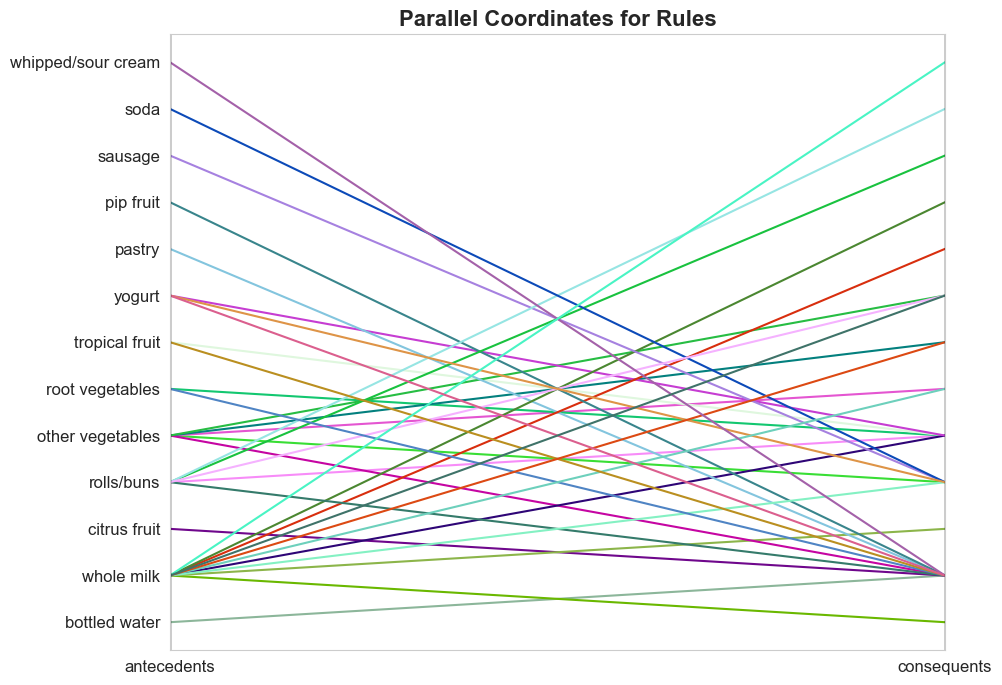

In [16]:
# Import parallel_coordinates
from pandas.plotting import parallel_coordinates

# Create function converting rules to coordinates
def rules_to_coordinates(rules):
    rules['antecedents'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequents'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    coords = rules[['antecedents', 'consequents', 'rule']]
    return coords
# Create coordinates
_ , rules_ = apriori_association_rules(grocery, min_support=0.03, metric="lift", min_threshold=1.00)
coords = rules_to_coordinates(rules_)

# Plot parallel coordinates
fig, ax = plt.subplots(figsize=(10, 8))
parallel_coordinates(coords, 'rule',
                    #  colormap='YlGnBu',
                     ax=ax)
plt.title('Parallel Coordinates for Rules', fontsize=16, fontweight='bold')
# Increase the size of y-axis label
ax.tick_params(axis='y', labelsize=12)
# Increase the size of x-axis label
ax.tick_params(axis='x', labelsize=12)
# hide legend
ax.get_legend().remove()
plt.show()

# <u>__Conclusion:__</u> Besides the work on aggregating the association rules by applying some advanced filtering methods with some metrics based on our business requirements, we can also use the visualizations to understand the rules in more detail and easily interpret them intuitively.